In [30]:
import tensorflow

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
import cv2

## <font color='black'> Generating dataset </font>

In [31]:
def create_dataframe(images_path):
    data=[]
    labels=[]
    classes=10
    for i in range(classes):
        img_path=os.path.join(images_path,str(i))
        for img in os.listdir(img_path):
            im=cv2.imread(images_path+'/'+str(i)+'/'+img)
            #im=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
            #im= remove_background(im)
            grayImage=im
            kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]],dtype=int)
            kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype=int)

            x = cv2.filter2D(grayImage, cv2.CV_16S, kernelx)
            y = cv2.filter2D(grayImage, cv2.CV_16S, kernely)
            absX = cv2.convertScaleAbs(x)
            absY = cv2.convertScaleAbs(y)
            Prewitt = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
            im = np.array(Prewitt)
            data.append(im)
            labels.append(i)
    data = np.array(data)
    labels = np.array(labels)
    return data,labels

In [32]:
data,labels=create_dataframe('Train_GRAY')


In [58]:
x_final_test,y_final_test=create_dataframe('Test_GRAY')

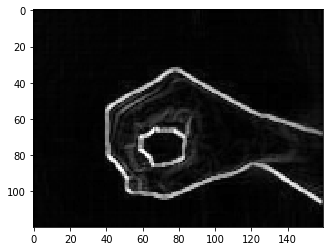

In [33]:
from matplotlib.pyplot import imshow
imshow(data[307],cmap='gray')

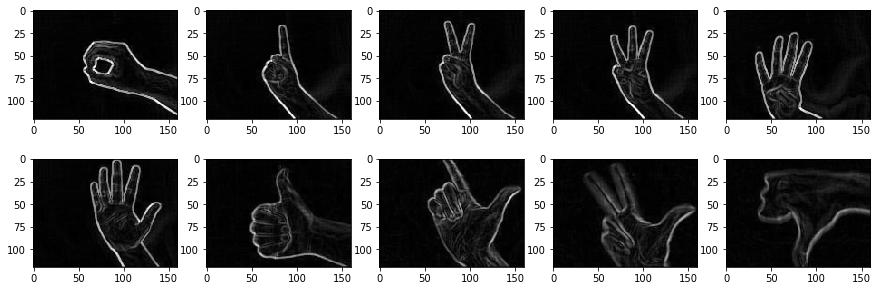

In [34]:
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(15, 5))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    img = data[i*360-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,cmap='gray')
plt.show()

In [35]:
x_final_test,y_final_test=create_dataframe('Test_GRAY')

In [36]:
x_final_test,_,y_final_test,_=train_test_split(x_final_test,y_final_test, test_size=0.001, random_state=42)

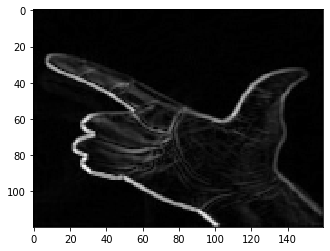

In [37]:
imshow(x_final_test[0],cmap='gray')

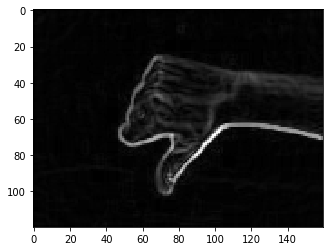

In [38]:
plt.imshow(x_train[0],cmap='gray')

## <font color='black'> CNN </font>

In [39]:
x_train.shape

(2880, 120, 160, 3)

In [40]:
#x_train= x_train[..., np.newaxis]
#x_test=x_test[..., np.newaxis]

In [41]:
x_final_test.shape

(400, 120, 160, 3)

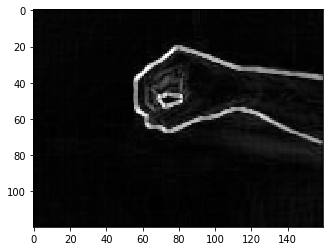

In [42]:
imshow(data[0])

In [43]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=(120,160,3)))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation="softmax"))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 116, 156, 32)      2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 152, 32)      25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 76, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 56, 76, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 54, 74, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 36, 64)       

In [45]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
# Hot Encoding 

y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

In [28]:
x_train[0]

array([[[0, 0, 0],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [0, 0, 0],
        [3, 3, 3],
        [0, 0, 0]],

       [[0, 0, 0],
        [3, 3, 3],
        [5, 5, 5],
        ...,
        [4, 4, 4],
        [8, 8, 8],
        [4, 4, 4]],

       [[0, 0, 0],
        [1, 1, 1],
        [3, 3, 3],
        ...,
        [6, 6, 6],
        [9, 9, 9],
        [6, 6, 6]],

       ...,

       [[3, 3, 3],
        [6, 6, 6],
        [6, 6, 6],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [3, 3, 3]],

       [[4, 4, 4],
        [6, 6, 6],
        [8, 8, 8],
        ...,
        [4, 4, 4],
        [3, 3, 3],
        [2, 2, 2]],

       [[0, 0, 0],
        [2, 2, 2],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [0, 0, 0]]], dtype=uint8)

In [48]:
x_train.shape

(2880, 120, 160, 3)

In [49]:
history=model.fit(x_train, y_train_encoded, epochs=10, validation_data=(x_test, y_test_encoded), batch_size=64)

Epoch 1/10
45/45 [==============================] - ETA: 4:01 - loss: 18.0950 - accuracy: 0.093 - ETA: 2:49 - loss: 50.9818 - accuracy: 0.089 - ETA: 2:43 - loss: 59.8471 - accuracy: 0.099 - ETA: 2:50 - loss: 60.7669 - accuracy: 0.111 - ETA: 2:55 - loss: 59.2531 - accuracy: 0.118 - ETA: 2:53 - loss: 56.9304 - accuracy: 0.123 - ETA: 2:54 - loss: 54.4087 - accuracy: 0.128 - ETA: 2:50 - loss: 51.9402 - accuracy: 0.132 - ETA: 2:44 - loss: 49.6190 - accuracy: 0.136 - ETA: 2:39 - loss: 47.4741 - accuracy: 0.140 - ETA: 2:35 - loss: 45.5050 - accuracy: 0.142 - ETA: 2:30 - loss: 43.6998 - accuracy: 0.144 - ETA: 2:25 - loss: 42.0442 - accuracy: 0.146 - ETA: 2:21 - loss: 40.5232 - accuracy: 0.148 - ETA: 2:18 - loss: 39.1224 - accuracy: 0.150 - ETA: 2:13 - loss: 37.8291 - accuracy: 0.152 - ETA: 2:10 - loss: 36.6318 - accuracy: 0.153 - ETA: 2:06 - loss: 35.5200 - accuracy: 0.155 - ETA: 2:01 - loss: 34.4849 - accuracy: 0.156 - ETA: 1:57 - loss: 33.5189 - accuracy: 0.158 - ETA: 1:52 - loss: 32.6152 - 

45/45 [==============================] - ETA: 3:23 - loss: 0.3757 - accuracy: 0.89 - ETA: 3:02 - loss: 0.3422 - accuracy: 0.91 - ETA: 2:54 - loss: 0.3374 - accuracy: 0.91 - ETA: 2:51 - loss: 0.3364 - accuracy: 0.91 - ETA: 2:46 - loss: 0.3340 - accuracy: 0.91 - ETA: 2:41 - loss: 0.3420 - accuracy: 0.91 - ETA: 2:36 - loss: 0.3469 - accuracy: 0.91 - ETA: 2:32 - loss: 0.3488 - accuracy: 0.90 - ETA: 2:28 - loss: 0.3513 - accuracy: 0.90 - ETA: 2:25 - loss: 0.3525 - accuracy: 0.90 - ETA: 2:22 - loss: 0.3523 - accuracy: 0.90 - ETA: 2:20 - loss: 0.3513 - accuracy: 0.90 - ETA: 2:15 - loss: 0.3504 - accuracy: 0.90 - ETA: 2:11 - loss: 0.3494 - accuracy: 0.90 - ETA: 2:08 - loss: 0.3479 - accuracy: 0.90 - ETA: 2:05 - loss: 0.3468 - accuracy: 0.90 - ETA: 2:01 - loss: 0.3458 - accuracy: 0.90 - ETA: 1:57 - loss: 0.3451 - accuracy: 0.90 - ETA: 1:52 - loss: 0.3443 - accuracy: 0.90 - ETA: 1:48 - loss: 0.3439 - accuracy: 0.90 - ETA: 1:43 - loss: 0.3436 - accuracy: 0.90 - ETA: 1:39 - loss: 0.3435 - accuracy

45/45 [==============================] - ETA: 4:04 - loss: 0.1092 - accuracy: 0.95 - ETA: 3:36 - loss: 0.1251 - accuracy: 0.94 - ETA: 3:20 - loss: 0.1347 - accuracy: 0.94 - ETA: 3:16 - loss: 0.1425 - accuracy: 0.93 - ETA: 3:10 - loss: 0.1539 - accuracy: 0.93 - ETA: 3:07 - loss: 0.1585 - accuracy: 0.93 - ETA: 3:01 - loss: 0.1598 - accuracy: 0.93 - ETA: 2:55 - loss: 0.1622 - accuracy: 0.93 - ETA: 2:50 - loss: 0.1644 - accuracy: 0.93 - ETA: 2:45 - loss: 0.1677 - accuracy: 0.93 - ETA: 2:41 - loss: 0.1721 - accuracy: 0.93 - ETA: 2:35 - loss: 0.1754 - accuracy: 0.93 - ETA: 2:31 - loss: 0.1776 - accuracy: 0.93 - ETA: 2:26 - loss: 0.1801 - accuracy: 0.93 - ETA: 2:22 - loss: 0.1817 - accuracy: 0.93 - ETA: 2:17 - loss: 0.1830 - accuracy: 0.93 - ETA: 2:12 - loss: 0.1840 - accuracy: 0.93 - ETA: 2:07 - loss: 0.1845 - accuracy: 0.93 - ETA: 2:01 - loss: 0.1850 - accuracy: 0.93 - ETA: 1:56 - loss: 0.1855 - accuracy: 0.93 - ETA: 1:51 - loss: 0.1860 - accuracy: 0.93 - ETA: 1:46 - loss: 0.1868 - accuracy

45/45 [==============================] - ETA: 3:49 - loss: 0.0859 - accuracy: 0.96 - ETA: 3:26 - loss: 0.0981 - accuracy: 0.97 - ETA: 3:17 - loss: 0.1023 - accuracy: 0.97 - ETA: 3:12 - loss: 0.1063 - accuracy: 0.96 - ETA: 3:15 - loss: 0.1063 - accuracy: 0.96 - ETA: 3:17 - loss: 0.1073 - accuracy: 0.96 - ETA: 3:08 - loss: 0.1076 - accuracy: 0.96 - ETA: 3:01 - loss: 0.1095 - accuracy: 0.96 - ETA: 2:53 - loss: 0.1103 - accuracy: 0.96 - ETA: 2:46 - loss: 0.1114 - accuracy: 0.96 - ETA: 2:40 - loss: 0.1123 - accuracy: 0.96 - ETA: 2:37 - loss: 0.1128 - accuracy: 0.96 - ETA: 2:32 - loss: 0.1137 - accuracy: 0.96 - ETA: 2:28 - loss: 0.1142 - accuracy: 0.96 - ETA: 2:23 - loss: 0.1146 - accuracy: 0.96 - ETA: 2:19 - loss: 0.1156 - accuracy: 0.96 - ETA: 2:13 - loss: 0.1172 - accuracy: 0.96 - ETA: 2:08 - loss: 0.1183 - accuracy: 0.96 - ETA: 2:03 - loss: 0.1190 - accuracy: 0.96 - ETA: 1:58 - loss: 0.1196 - accuracy: 0.96 - ETA: 1:54 - loss: 0.1200 - accuracy: 0.96 - ETA: 1:49 - loss: 0.1203 - accuracy

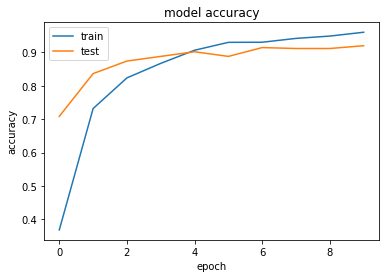

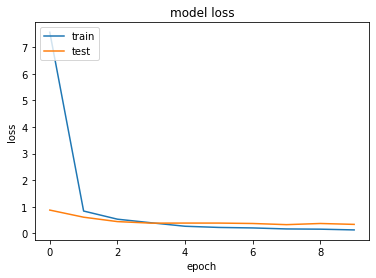

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [59]:
model.save("model_Prewitt.h5")

In [62]:
from sklearn.metrics import accuracy_score
x_cnn=x_final_test
predictions = model.predict_classes(x_cnn)
print("accuracy: ", accuracy_score(y_final_test, predictions))

accuracy:  0.9002493765586035


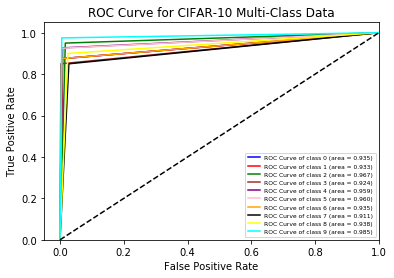

In [64]:
# one hot encoded softmax predictions
from sklearn.metrics import roc_curve, auc
y_score = to_categorical(predictions, 10)
ytest_binary =  to_categorical(y_final_test, 10) # one hot encode the test data true labels
class_labels=[0,1,2,3,4,5,6,7,8,9]
n_classes =10
fpr = dict()
tpr = dict()
roc_auc = dict() 
    # compute fpr and tpr with roc_curve from the ytest true labels to the scores
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest_binary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plot each class  curve on single graph for multi-class one vs all classification
from itertools import cycle
colors = cycle(['blue', 'red', 'green', 'brown', 'purple', 'pink', 'orange', 'black', 'yellow', 'cyan'])
for i, color, lbl in zip(range(n_classes), colors, class_labels):
    plt.plot(fpr[i], tpr[i], color = color, lw = 1.5,
    label = 'ROC Curve of class {0} (area = {1:0.3f})'.format(lbl, roc_auc[i]))
save_plot_path='Dataset'
plt.plot([0, 1], [0, 1], 'k--', lw = 1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CIFAR-10 Multi-Class Data')
plt.legend(loc = 'lower right', prop = {'size': 6})

plt.show()

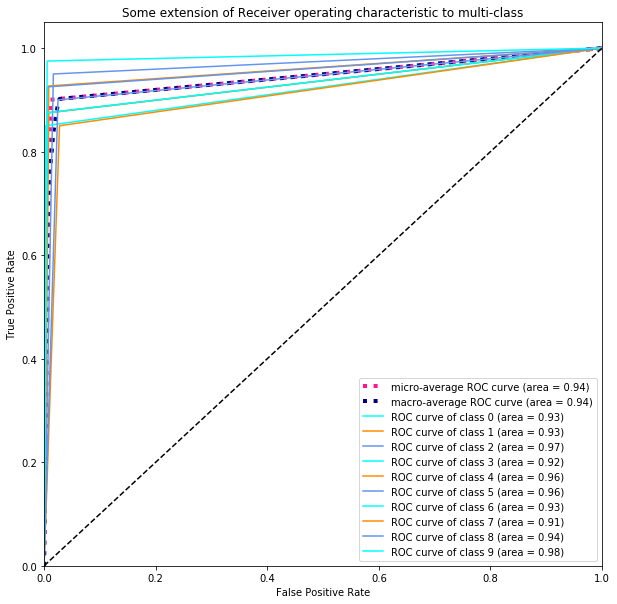

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

y_test=to_categorical(y_final_test,10)
y_score = to_categorical(predictions,10)
n_classes=10
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])





all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, 
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right",prop={'size': 10})
plt.show()

In [204]:
y_final_test

array([7, 0, 5, 2, 2, 9, 2, 5, 3, 0, 9, 1, 1, 3, 1, 6, 6, 5, 5, 1, 0, 9,
       8, 0, 9, 2, 8, 9, 2, 9, 4, 6, 1, 8, 2, 2, 9, 3, 3, 8, 1, 1, 0, 2,
       9, 3, 4, 0, 4, 1, 7, 8, 1, 9, 0, 5, 4, 0, 3, 3, 6, 7, 1, 2, 0, 6,
       5, 5, 1, 7, 3, 0, 1, 9, 6, 5, 9, 4, 6, 0, 0, 5, 8, 6, 1, 6, 7, 2,
       2, 5, 8, 2, 8, 4, 6, 9, 6, 6, 1, 6, 2, 0, 1, 3, 0, 0, 3, 8, 8, 3,
       5, 9, 9, 7, 1, 1, 7, 8, 9, 3, 2, 0, 6, 0, 4, 8, 9, 4, 6, 7, 3, 9,
       4, 2, 4, 8, 6, 5, 9, 0, 3, 7, 3, 5, 4, 1, 2, 4, 9, 0, 7, 9, 3, 0,
       4, 2, 2, 7, 8, 9, 5, 8, 4, 8, 2, 4, 4, 3, 5, 2, 1, 3, 2, 3, 7, 2,
       5, 1, 0, 0, 3, 3, 8, 4, 1, 7, 7, 5, 7, 4, 3, 3, 7, 2, 8, 5, 8, 5,
       7, 8, 4, 5, 7, 8, 7, 3, 0, 0, 6, 4, 5, 2, 4, 8, 6, 2, 9, 6, 9, 7,
       9, 4, 7, 3, 3, 4, 4, 9, 0, 5, 2, 9, 5, 0, 3, 7, 5, 9, 6, 7, 9, 3,
       1, 8, 0, 2, 8, 2, 6, 7, 3, 6, 4, 7, 1, 9, 1, 2, 6, 4, 3, 0, 0, 0,
       4, 3, 8, 8, 5, 2, 1, 5, 7, 7, 4, 1, 7, 5, 6, 8, 0, 6, 9, 2, 5, 8,
       5, 4, 2, 5, 1, 1, 0, 6, 4, 8, 0, 9, 5, 6, 7,

In [208]:
from sklearn.preprocessing import label_binarize
y = label_binarize(y_final_test, classes=[0,1,2,3,4,5,6,7,8,9])

In [211]:
yx=to_categorical(y_final_test,10)

In [212]:
y==yx

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])